<a href="https://colab.research.google.com/github/jays2241/Classification-Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction%203rd%20commit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascular Risk Prediction (Classification)



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name**    - Jay Sawant

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/jays2241/Classification-Cardiovascular-Risk-Prediction

# **Problem Statement**


**The problem is to develop a machine learning model that can predict the Ten-Year Coronary Heart Disease (CHD) risk for individuals based on their demographic and health-related attributes. The dataset includes information such as age, education level, sex, smoking habits, blood pressure, cholesterol levels, BMI, heart rate, and glucose levels. The goal is to utilize this data to accurately classify individuals as either having a high risk of developing CHD within the next ten years or having a low risk.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [52]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### Dataset Loading

In [53]:
# Load Dataset
original_df = pd.read_csv('/content/data_cardiovascular_risk.csv')
df = original_df.copy()

### Dataset First View

In [54]:
# Dataset First Look
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [55]:
# Dataset Rows & Columns count
df.shape

(3390, 17)

### Dataset Information

In [56]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [57]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [58]:
# Missing Values/Null Values Count
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

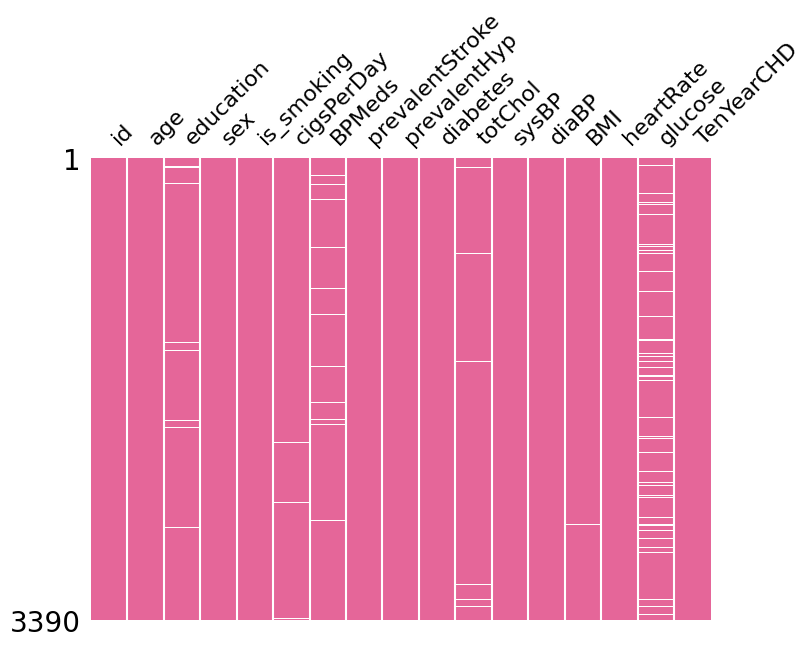

In [59]:
# Visualizing the missing values
fig, ax = plt.subplots(figsize=(8, 6))
color = (0.9, 0.4, 0.6)
msno.matrix(df, figsize=(8, 6), color=color, ax=ax,sparkline=False)
plt.show()

### What did you know about your dataset?

- The dataset consists of 3390 rows and 17 columns. Here are the column names:

  id,
age,
education,
sex,
is_smoking,
cigsPerDay,
BPMeds,
prevalentStroke,
prevalentHyp,
diabetes,
totChol,
sysBP,
diaBP,
BMI,
heartRate,
glucose,
TenYearCHD,

- The dataset contains missing values in the following columns:
  1. education: 87 missing values
  2. cigsPerDay: 22 missing values
  3. BPMeds: 44 missing values
  4. totChol: 38 missing values
  5. BMI: 14 missing values
  6. heartRate: 1 missing value
  7. glucose: 304 missing values

## ***2. Understanding Your Variables***

In [60]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [61]:
# Dataset Describe
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description

| Column Name       | Description                                               | Missing Values |
|-------------------|-----------------------------------------------------------|----------------|
| id                | Unique identifiers for each entry                          | 0              |
| age               | Age of the individuals in the dataset                      | 0              |
| education         | Educational level of the individuals                      | 87             |
| sex               | Gender of the individuals                                 | 0              |
| is_smoking        | Indicates whether an individual is a smoker or not         | 0              |
| cigsPerDay        | Number of cigarettes smoked per day                        | 22             |
| BPMeds            | Indicates whether an individual is taking BP medications   | 44             |
| prevalentStroke   | Indicates whether an individual has had a stroke           | 0              |
| prevalentHyp      | Indicates whether an individual has prevalent hypertension | 0              |
| diabetes          | Indicates whether an individual has diabetes               | 0              |
| totChol           | Total cholesterol levels                                  | 38             |
| sysBP             | Systolic blood pressure                                   | 0              |
| diaBP             | Diastolic blood pressure                                  | 0              |
| BMI               | Body mass index                                           | 14             |
| heartRate         | Heart rate                                                | 1              |
| glucose           | Glucose levels                                            | 304            |
| TenYearCHD        | Presence of coronary heart disease within ten years        | 0              |


### Check Unique Values for each variable.

In [62]:
# Check Unique Values for each variable.
df.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [63]:
# Write your code to make your dataset analysis ready.
df.drop(['id'],axis = 1, inplace = True )

In [64]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

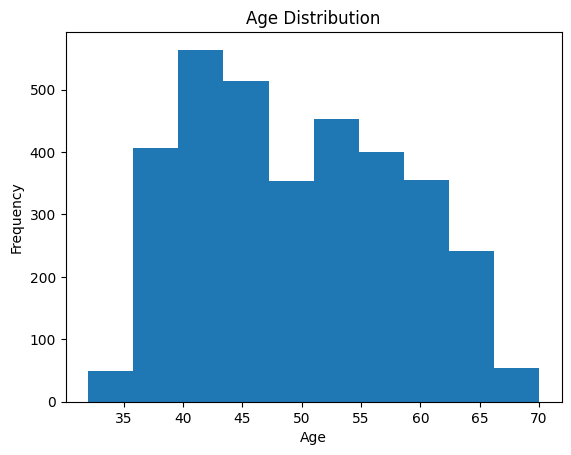

In [65]:
# Chart - 1 visualization code
plt.hist(df['age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


##### 1. Why did you pick the specific chart?

I picked the histogram chart to visualize the age distribution because it provides a clear and concise representation of the frequency or count of individuals at different age intervals.

##### 2. What is/are the insight(s) found from the chart?

Insights from the Age Distribution Histogram:

1. The age distribution appears to be slightly right-skewed, with a peak in the middle-aged range. This indicates that a higher number of individuals in the dataset fall within the middle-aged group compared to younger or older age groups.

2. The most common age range seems to be between approximately 40 and 60 years, as indicated by the highest frequency or count in that age interval.

3. There is a relatively smaller number of individuals in the younger age groups (below 40 years) and older age groups (above 60 years), suggesting a potential bias towards middle-aged individuals in the dataset.

4. The age distribution is not perfectly symmetrical, as there is a gradual decrease in the frequency as age increases beyond the peak range.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights from the Age Distribution Chart:

The insights gained from the age distribution chart can potentially contribute to creating a positive business impact and identifying growth opportunities. Here is a summary of the insights:

1. **Peak in the Middle-Aged Range**: The age distribution appears to be slightly right-skewed, with a peak in the middle-aged range (40-60 years). This indicates a higher number of individuals in this age group. Businesses can target this segment with tailored products and services to meet their specific needs and preferences.

2. **Potential Market Gap in Younger and Older Age Groups**: There is a relatively smaller number of individuals in the younger age groups (below 40 years) and older age groups (above 60 years). This suggests a potential market gap that businesses can explore to capture these segments and drive growth. Neglecting these age groups could lead to missed opportunities.





#### Chart - 2

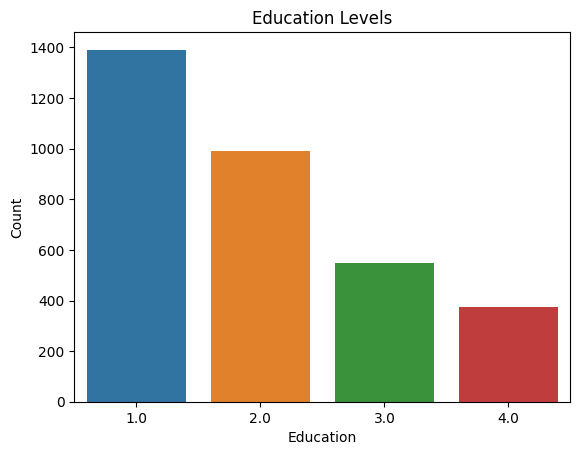

In [66]:
# Chart - 2 visualization code
sns.countplot(x='education', data=df)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education Levels')
plt.show()

##### 1. Why did you pick the specific chart?

Education is a categorical variable that represents different levels of education achieved by individuals in the dataset. A countplot is suitable for visualizing the distribution of categories within a categorical variable.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

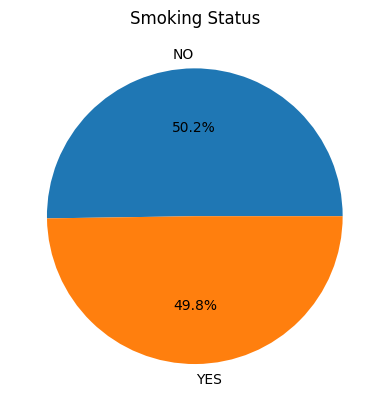

In [67]:
# Chart - 3 visualization code
smoking_counts = df['is_smoking'].value_counts()
labels = smoking_counts.index
sizes = smoking_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Smoking Status')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

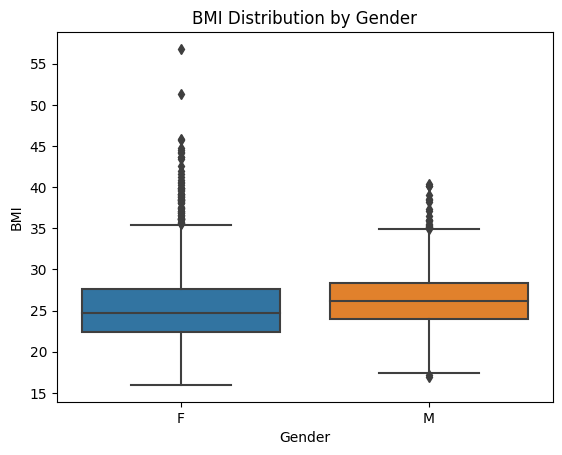

In [68]:
# Chart - 4 visualization code
sns.boxplot(x='sex', y='BMI', data=df)
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.title('BMI Distribution by Gender')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

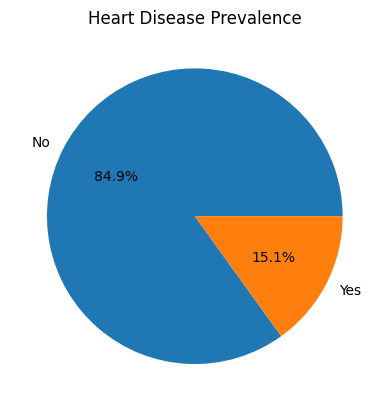

In [69]:
# Chart - 5 visualization code
heart_disease_counts = df['TenYearCHD'].value_counts()
labels = ['No', 'Yes']
sizes = heart_disease_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Heart Disease Prevalence')
plt.show()



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

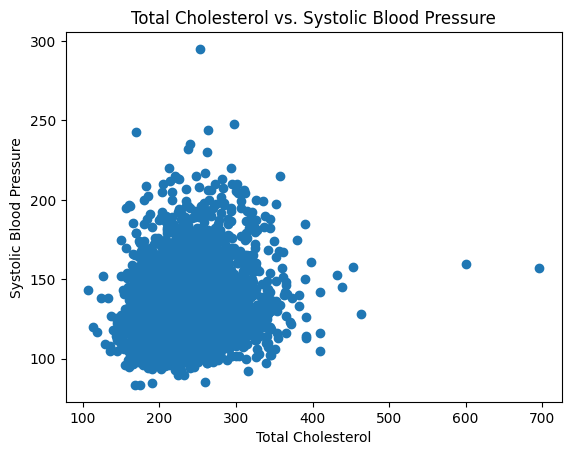

In [70]:
# Chart - 6 visualization code
plt.scatter(df['totChol'], df['sysBP'])
plt.xlabel('Total Cholesterol')
plt.ylabel('Systolic Blood Pressure')
plt.title('Total Cholesterol vs. Systolic Blood Pressure')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

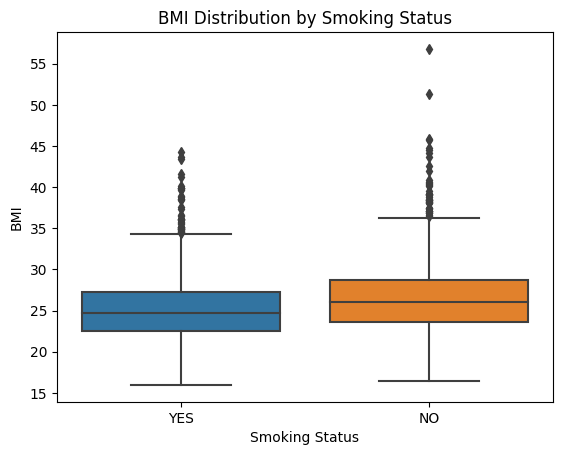

In [71]:
# Chart - 7 visualization code
sns.boxplot(x='is_smoking', y='BMI', data=df)
plt.xlabel('Smoking Status')
plt.ylabel('BMI')
plt.title('BMI Distribution by Smoking Status')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

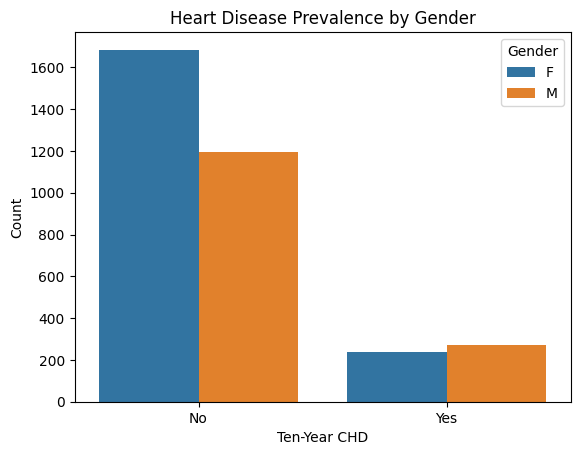

In [72]:
# Chart - 8 visualization code
sns.countplot(x='TenYearCHD', hue='sex', data=df)
plt.xlabel('Ten-Year CHD')
plt.ylabel('Count')
plt.title('Heart Disease Prevalence by Gender')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(title='Gender', loc='upper right')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

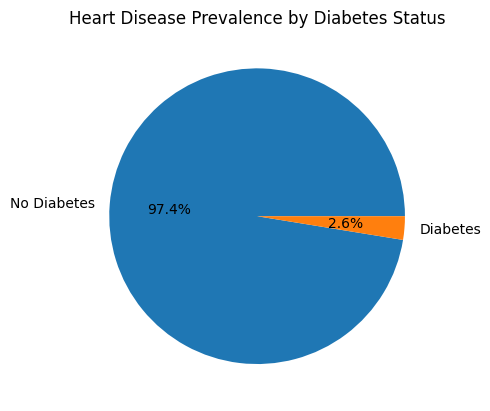

In [73]:
# Chart - 9 visualization code
diabetes_counts = df.groupby('diabetes')['TenYearCHD'].value_counts().unstack().fillna(0)
labels = ['No Diabetes', 'Diabetes']
sizes = diabetes_counts.sum(axis=1)

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Heart Disease Prevalence by Diabetes Status')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

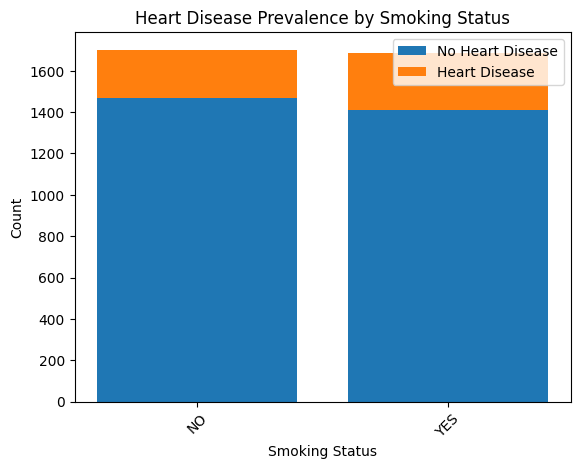

In [74]:
# Chart - 10 visualization code
smoking_counts = df.groupby('is_smoking')['TenYearCHD'].value_counts().unstack().fillna(0)

plt.bar(smoking_counts.index, smoking_counts[0], label='No Heart Disease')
plt.bar(smoking_counts.index, smoking_counts[1], bottom=smoking_counts[0], label='Heart Disease')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.title('Heart Disease Prevalence by Smoking Status')
plt.legend()
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

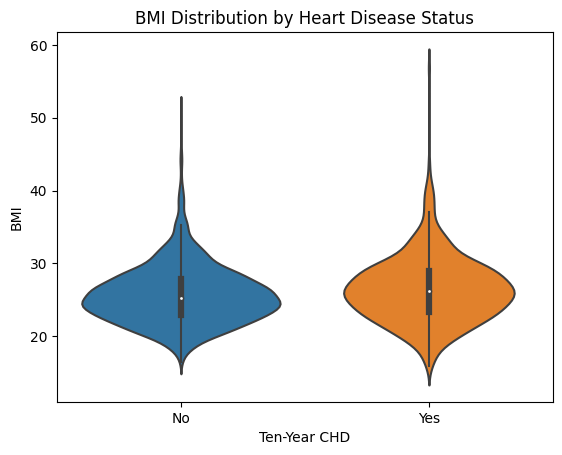

In [75]:
# Chart - 11 visualization code
sns.violinplot(x='TenYearCHD', y='BMI', data=df)
plt.xlabel('Ten-Year CHD')
plt.ylabel('BMI')
plt.title('BMI Distribution by Heart Disease Status')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

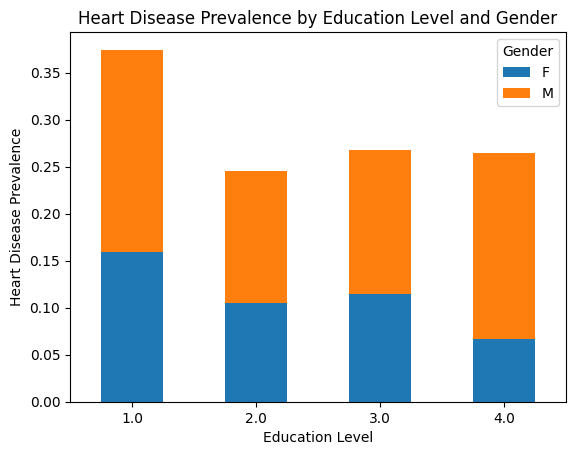

In [76]:
# Chart - 12 visualization code
# Group by education and sex, and calculate heart disease prevalence
grouped = df.groupby(['education', 'sex'])['TenYearCHD'].mean().unstack()

# Plot grouped bar plot
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Education Level')
plt.ylabel('Heart Disease Prevalence')
plt.title('Heart Disease Prevalence by Education Level and Gender')
plt.legend(title='Gender')
plt.xticks(rotation=0)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

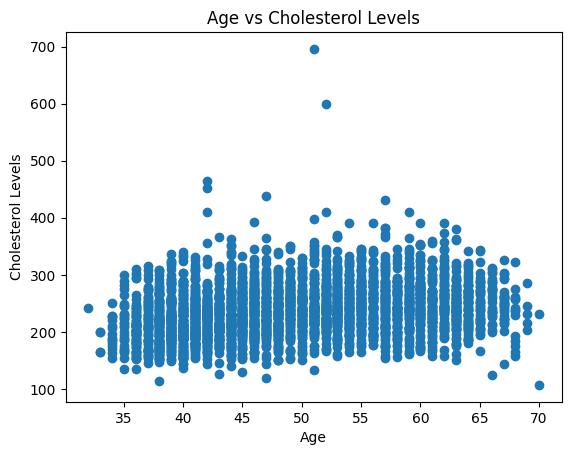

In [77]:
# Chart - 13 visualization code
plt.scatter(df['age'], df['totChol'])
plt.xlabel('Age')
plt.ylabel('Cholesterol Levels')
plt.title('Age vs Cholesterol Levels')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<ipython-input-78-e451e8134543>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


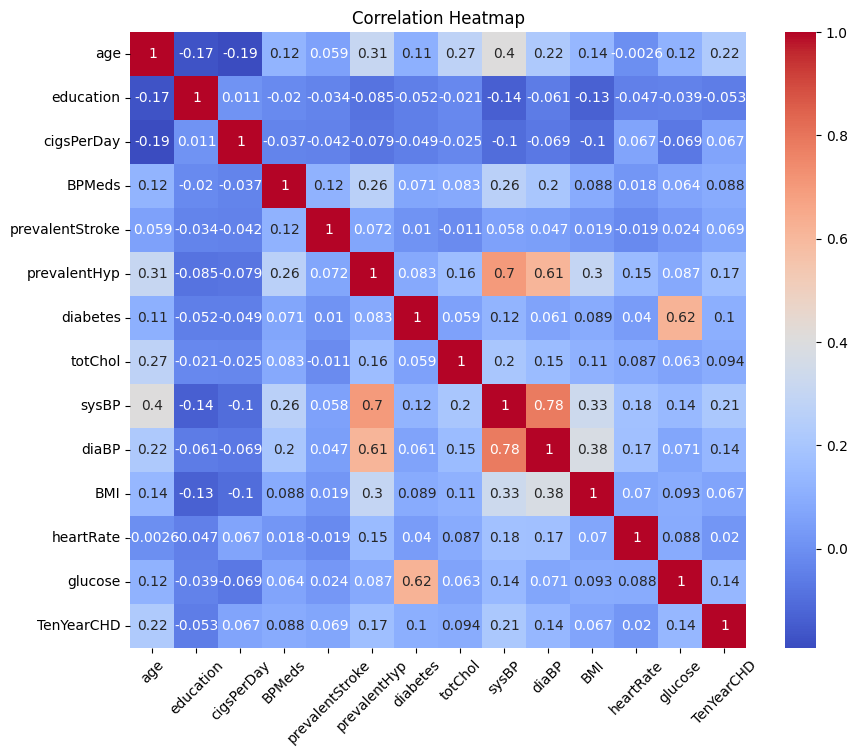

In [78]:
# Correlation Heatmap visualization code
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

# Customize the plot
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [79]:
# # Pair Plot visualization code

# # Select the columns you want to include in the pair plot
# columns = ['age', 'education', 'cigsPerDay', 'sysBP', 'BMI', 'glucose', 'TenYearCHD']

# # Create the pair plot
# sns.pairplot(df[columns], hue='TenYearCHD', diag_kind='hist')

# # Show the plot
# plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Statement 1: There is a significant difference in the mean age between individuals with and without a Ten-Year CHD (Coronary Heart Disease) risk.

Statement 2: The average BMI (Body Mass Index) is higher among individuals with a prevalent stroke compared to those without a prevalent stroke.

Statement 3: There is a significant association between smoking status (is_smoking) and the prevalence of hypertension (prevalentHyp).

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Question 1: Is there a significant difference in the mean age between individuals with and without a Ten-Year CHD risk?

Null Hypothesis (H0): The mean age of individuals with and without a Ten-Year CHD risk is the same.

Alternative Hypothesis (H1): The mean age of individuals with and without a Ten-Year CHD risk is different.

#### 2. Perform an appropriate statistical test.

In [80]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# Separate the age values for individuals with and without a Ten-Year CHD risk
age_with_chd = df[df['TenYearCHD'] == 1]['age']
age_without_chd = df[df['TenYearCHD'] == 0]['age']

# Perform independent two-sample t-test
t_statistic, p_value = stats.ttest_ind(age_with_chd, age_without_chd)

# Define significance level
alpha = 0.05

# Compare p-value with significance level
if p_value < alpha:
    conclusion = "Reject the null hypothesis. There is a significant difference in the mean age between individuals with and without a Ten-Year CHD risk."
else:
    conclusion = "Fail to reject the null hypothesis. There is no significant difference in the mean age between individuals with and without a Ten-Year CHD risk."

# Print the conclusion
print(conclusion)


Reject the null hypothesis. There is a significant difference in the mean age between individuals with and without a Ten-Year CHD risk.


##### Which statistical test have you done to obtain P-Value?


For the hypothesis testing in the code provided, an independent two-sample t-test was used to obtain the p-value. The t-test is used to compare the means of two independent groups and determine if there is a significant difference between them

##### Why did you choose the specific statistical test?

The independent two-sample t-test was chosen because it is suitable for comparing the means of two independent groups, which aligns with the hypothesis being tested. It assumes approximately normal distribution of the data and independence between the groups, making it appropriate for analyzing the age difference between individuals with and without Ten-Year CHD risk.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Question 2: Is the average BMI higher among individuals with a prevalent stroke compared to those without a prevalent stroke?

Null Hypothesis (H0): There is no significant difference in the average BMI between individuals with and without a prevalent stroke.

Alternative Hypothesis (H1): The average BMI is higher among individuals with a prevalent stroke compared to those without a prevalent stroke.

#### 2. Perform an appropriate statistical test.

In [81]:
# Perform Statistical Test to obtain P-Value
# Extract BMI values for individuals with and without a prevalent stroke
bmi_prevalent_stroke = df[df['prevalentStroke'] == 1]['BMI']
bmi_no_prevalent_stroke = df[df['prevalentStroke'] == 0]['BMI']

# Perform independent two-sample t-test
t_stat, p_value = stats.ttest_ind(bmi_prevalent_stroke, bmi_no_prevalent_stroke, equal_var=False)

# Set significance level (alpha)
alpha = 0.05

# Print the results
if p_value < alpha:
    print("Reject null hypothesis")
    print("The average BMI is significantly higher among individuals with a prevalent stroke compared to those without.")
else:
    print("Fail to reject null hypothesis")
    print("There is no significant difference in the average BMI between individuals with and without a prevalent stroke.")

Fail to reject null hypothesis
There is no significant difference in the average BMI between individuals with and without a prevalent stroke.


##### Which statistical test have you done to obtain P-Value?


The statistical test used to obtain the p-value in the provided code is the independent two-sample t-test. This test is used to compare the means of two independent groups and determine if there is a statistically significant difference between them. The ttest_ind() function from the scipy.stats module is used to perform this test.

##### Why did you choose the specific statistical test?

The specific statistical test chosen, which is the independent two-sample t-test, was selected based on the nature of the hypothesis being tested. In this case, we want to compare the average BMI between two groups: individuals with a prevalent stroke and those without a prevalent stroke. The t-test is commonly used when comparing the means of two independent groups to determine if there is a significant difference between them.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Question 3: Is there a significant association between smoking status (is_smoking) and the prevalence of hypertension (prevalentHyp)?

Null Hypothesis (H0): There is no significant association between smoking status and the prevalence of hypertension.

Alternative Hypothesis (H1): There is a significant association between smoking status and the prevalence of hypertension.

#### 2. Perform an appropriate statistical test.

In [82]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import chi2_contingency

# Contingency table
contingency_table = pd.crosstab(df['is_smoking'], df['prevalentHyp'])

# Chi-square test of independence
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)

# Set the significance level
alpha = 0.05

# Compare p-value with significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant association between smoking status and the prevalence of hypertension.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between smoking status and the prevalence of hypertension.")


Chi-square statistic: 47.75608417658488
P-value: 4.826839626832195e-12
Reject the null hypothesis. There is a significant association between smoking status and the prevalence of hypertension.


##### Which statistical test have you done to obtain P-Value?

The code provided performs a chi-square test of independence to obtain the p-value. The chi-square test is used to determine if there is a significant association between two categorical variables. In this case, we are testing the association between smoking status (is_smoking) and the prevalence of hypertension (prevalentHyp). The chi2_contingency function from the scipy.stats library is used to calculate the chi-square statistic and the corresponding p-value.

##### Why did you choose the specific statistical test?

I chose the chi-square test of independence because it is commonly used to analyze the association between two categorical variables. In this case, we are examining the relationship between smoking status (is_smoking) and the prevalence of hypertension (prevalentHyp), both of which are categorical variables. The chi-square test assesses whether there is a statistically significant association between these variables, indicating if they are dependent or independent. By using the chi-square test, we can evaluate if there is evidence to support a relationship between smoking status and hypertension prevalence in the dataset.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [83]:
# Handling Missing Values & Missing Value Imputation
#Checking missing values
df.isna().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [84]:
# Fill missing values with mode for categorical columns
categorical_columns = ['sex', 'is_smoking','education','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Fill missing values with mean for numerical columns
numerical_columns = ['age','cigsPerDay', 'BPMeds', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']
for column in numerical_columns:
    df[column].fillna(df[column].mean(), inplace=True)

In [85]:
df.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

1. Mode Imputation for Categorical Columns:

  Categorical columns such as 'sex', 'is_smoking', 'education', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', and 'TenYearCHD' are filled with the mode of each respective column using the fillna method.
Mode imputation is suitable for categorical variables as it replaces missing values with the most frequent value in the column, which helps preserve the overall distribution and does not introduce new values.

2. Mean Imputation for Numerical Columns:

  Numerical columns such as 'age', 'cigsPerDay', 'BPMeds', 'totChol','sysBP', 'diaBP', 'BMI', 'heartRate', and 'glucose' are filled with the mean of each respective column using the fillna method.
Mean imputation is a common technique for numerical variables where missing values are replaced with the mean of the available values in the column. It provides a reasonable estimate of the missing values without significantly affecting the overall distribution of the data.

### 2. Handling Outliers

In [86]:
# Define the columns to check for outliers
numerical_columns = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Function to count outliers in a column
def count_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
    return outliers.sum()

# Loop through numerical columns and count outliers
outlier_counts = {}
for column in numerical_columns:
    count = count_outliers(df, column)
    outlier_counts[column] = count

# Print the number of outliers in each column
for column, count in outlier_counts.items():
    print(f"Column '{column}': {count} outliers")


Column 'age': 0 outliers
Column 'cigsPerDay': 9 outliers
Column 'totChol': 43 outliers
Column 'sysBP': 105 outliers
Column 'diaBP': 58 outliers
Column 'BMI': 79 outliers
Column 'heartRate': 64 outliers
Column 'glucose': 214 outliers


In [87]:
# Function to handle outliers using IQR method
def handle_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Loop through numerical columns and handle outliers
for column in numerical_columns:
    handle_outliers(df, column)


In [88]:
# Loop through numerical columns and count outliers
outlier_counts = {}
for column in numerical_columns:
    count = count_outliers(df, column)
    outlier_counts[column] = count

# Print the number of outliers in each column
for column, count in outlier_counts.items():
    print(f"Column '{column}': {count} outliers")


Column 'age': 0 outliers
Column 'cigsPerDay': 0 outliers
Column 'totChol': 0 outliers
Column 'sysBP': 0 outliers
Column 'diaBP': 0 outliers
Column 'BMI': 0 outliers
Column 'heartRate': 0 outliers
Column 'glucose': 0 outliers


##### What all outlier treatment techniques have you used and why did you use those techniques?

The IQR method is commonly used to identify outliers. It defines the lower bound as the first quartile (Q1) minus 1.5 times the IQR and the upper bound as the third quartile (Q3) plus 1.5 times the IQR. Any value below the lower bound or above the upper bound is considered an outlier.

By replacing the outliers with the nearest non-outlier values within the calculated bounds, the Winsorization technique helps to reduce the impact of extreme values without completely removing them from the dataset. This approach is chosen to preserve the overall distribution and characteristics of the data while minimizing the influence of outliers on statistical analysis and modeling.

### 3. Categorical Encoding

In [89]:
# Encode your categorical columns
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['is_smoking_encoded']=label_encoder.fit_transform(df['is_smoking'])
df['sex_encoded']=label_encoder.fit_transform(df['sex'])

In [90]:
df.drop(['sex','is_smoking'],axis=1,inplace=True)

In [91]:
encoded_education=pd.get_dummies(df['education'],prefix='education')
# Concat this encoded_education to the original data
df =pd.concat([df,encoded_education],axis=1)
#drop the original column 'education'
df.drop(['education'],inplace=True,axis=1)

In [92]:
df.shape

(3390, 19)

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [212]:
# Expand Contraction

#### 2. Lower Casing

In [213]:
# Lower Casing

#### 3. Removing Punctuations

In [214]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [215]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [216]:
# Remove Stopwords

In [217]:
# Remove White spaces

#### 6. Rephrase Text

In [218]:
# Rephrase Text

#### 7. Tokenization

In [219]:
# Tokenization

#### 8. Text Normalization

In [220]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [221]:
# POS Taging

#### 10. Text Vectorization

In [222]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [223]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif(data):
  vif =pd.DataFrame()
  vif['variables']=data.columns
  vif['VIF']=[variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
  return vif

In [94]:
not_for_vif = ['TenYearCHD', 'is_smoking_encoded', 'sex_encoded', 'education_1.0',
       'education_2.0', 'education_3.0', 'education_4.0']

get_vif(df[[i for i in df.describe().columns if i not in not_for_vif]])

,variables,VIF
0,age,43.319423
1,cigsPerDay,1.651055
2,BPMeds,1.130646
3,prevalentStroke,1.026319
4,prevalentHyp,2.487689
5,diabetes,1.086879
6,totChol,33.884670
7,sysBP,154.080864
8,diaBP,136.692580
9,BMI,50.633221


In [226]:
df.drop(['diaBP'],axis = 1,inplace = True)

In [243]:
get_vif(df[[i for i in df.describe().columns if i not in not_for_vif]])

,variables,VIF
0,age,42.842480
1,cigsPerDay,1.648696
2,BPMeds,1.130257
3,prevalentStroke,1.026040
4,prevalentHyp,2.487632
5,diabetes,1.079420
6,totChol,33.628191
7,sysBP,85.425185
8,BMI,46.017041
9,heartRate,40.932255


##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [228]:
# Transform Your data

### 6. Data Scaling

In [229]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [230]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [231]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [232]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [233]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [234]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [235]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [236]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [237]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [238]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [239]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [240]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [241]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [242]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***